<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Background" data-toc-modified-id="Background-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Background</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Libraries" data-toc-modified-id="Libraries-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Missing values</a></span></li><li><span><a href="#Duplicates" data-toc-modified-id="Duplicates-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Duplicates</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Feature Engineering</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Data-Prepocessing" data-toc-modified-id="Data-Prepocessing-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Data Prepocessing</a></span></li><li><span><a href="#Machine-Learning" data-toc-modified-id="Machine-Learning-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Machine Learning</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Support-Vector-Machines" data-toc-modified-id="Support-Vector-Machines-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Support Vector Machines</a></span></li><li><span><a href="#KNearest-Neighbors" data-toc-modified-id="KNearest-Neighbors-6.2.3"><span class="toc-item-num">6.2.3&nbsp;&nbsp;</span>KNearest Neighbors</a></span></li><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-6.2.4"><span class="toc-item-num">6.2.4&nbsp;&nbsp;</span>Naive Bayes</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-6.2.5"><span class="toc-item-num">6.2.5&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Neural-Networks" data-toc-modified-id="Neural-Networks-6.2.6"><span class="toc-item-num">6.2.6&nbsp;&nbsp;</span>Neural Networks</a></span></li></ul></li><li><span><a href="#Ensemble-models" data-toc-modified-id="Ensemble-models-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Ensemble models</a></span><ul class="toc-item"><li><span><a href="#VotingClassifier" data-toc-modified-id="VotingClassifier-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>VotingClassifier</a></span></li><li><span><a href="#BaggingClassifier" data-toc-modified-id="BaggingClassifier-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>BaggingClassifier</a></span></li></ul></li></ul></li><li><span><a href="#Balancing-the-data" data-toc-modified-id="Balancing-the-data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Balancing the data</a></span><ul class="toc-item"><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Downsampling</a></span></li><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#SMOTE" data-toc-modified-id="SMOTE-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>SMOTE</a></span></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

<a href="https://colab.research.google.com/github/Maredipinkydimakatso/jhb-ss3-classification-Repo/blob/master/Classification_submission_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background

The earth climates is changing very fast and differently nowadays climate changes in our earth are affecting our lives psychologically, physically and emotionally. some see it as a natural occurrence and others see it as a man made catastrophe, the fact is simple that the world climate is changing What is climate change? Climate change is the seasonal changes for a long period of time in the world. The climate patterns effect our economies and ecosystems For example, the changes in climate can affect how people, plants and animal live, such as food production and health risks.

the earth’s climate is very broad and always changing causing a good deal concern for us as humans.However, what are the causes and effects of climate changes that affecting our lives and environment?

There are two main causes of climate changes – natural causes and human activities. Natural causes have influenced the earth’s climates such as volcanic eruptions, ocean current, the earth’s orbital changes and solar variations.

All the causes are giving a great impact for climate changes in our earth.the consequences We can see that there are three main effects on climate changes in our environment. Firstly, climate change in the world affects human health. There are so many past researches showed that climate change will leads to human health and producing diseases. Secondly, climate changes will also affect the biodiversity. Biodiversity is very important for the plants and animals to maintain their habitat and ecosystem. The climate changes have impacted the loss of biodiversity.

When we have a look at our Neutral occurrence sentiment graph each of these topics are becoming more and more relevant each day and rightfully so.This has made the “#climate” thee most talked about topic on the news and social media

Trump once said “Nobody really knows if it climate change is real as we can see in our anti class graph he is number one in trends.This has proved to be untrue according to a survey, over 97% of scientists say that climate change was mostly if not all man made.The president of the U.S went as far as branding it’s former president Mr Obama’s climate change legacy as “stupid”.The Obama rule was devised to shut down hundreds of heavily polluting coal-fired power plants and freeze construction of new coal plants, while replacing them with vast wind and solar farms. Which sounded like a great idea to me.These series of tweets lands him on our highest trend on our anti graph

# Introduction

* Information about this classification sprint, what was the task at hand 
* Data Analysis Framework

# Libraries

In [1]:
# standard libraries
import pandas as pd
import numpy as np

# plotting libraries
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import seaborn as sns
%matplotlib inline
rcParams['figure.figsize'] = 10,8
sns.set(style='whitegrid', palette='muted')

# text analysis libraries
import re
import spacy
import string

# model building and valuation libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, recall_score, precision_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# other libraries
import warnings
warnings.filterwarnings('ignore')

# Data

## Overview

In [31]:
df = pd.read_csv('train.csv')

In [32]:
# Check the first five rows of the dataframe
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
sentiment    15819 non-null int64
message      15819 non-null object
tweetid      15819 non-null int64
dtypes: int64(2), object(1)
memory usage: 370.8+ KB


The data frame consists of three columns, sentiment which is an interger value refering to the tweet class.

| **Class** | **Description** |
| :----------: | :------------- |
| 2 | **News:** the tweet links to factual news about climate change |
| 1 | **Pro:** the tweet supports the belief of man-made climate change |
| 0 | **Neutral:** the tweet neither supports nor refutes the belief of man-made climate change |
| -1 | **Anti:** the tweet does not believe in man-made climate change |

source: https://www.kaggle.com/c/climate-change-belief-analysis/data

The message column is in text format for tweets collected from April 2015 to February 2018 on people expressing the belief 
about man-made climate change. The tweetid is a unique integer value corresponding to the tweet message.

In [34]:
print(f'The dataframe consists of {len(df)} twitter messages.')

The dataframe consists of 15819 twitter messages.


## Missing values

In [35]:
# Check for NaN entries
df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

There are currently no missing values in the dataset.

In [36]:
# Sometimes empty strings can be regarded as not being null, therefore there has to be a check for empty strings message column.
blanks = []
for index, sentiment, message, tweetid in df.itertuples():
    if message.isspace():
        blanks.append(index)

In [37]:
blanks

[]

Similarly, there appears to be no empty strings in the dataset.

## Duplicates

In [38]:
# Original length of dataset 
original_len = len(df)

In [39]:
original_len

15819

In [41]:
all_duplicates = df[df.duplicated(['message'])]

In [42]:
all_duplicates.head(10)

,sentiment,message,tweetid
51,1,RT @StephenSchlegel: she's thinking about how ...,785499
70,1,"RT @kelkulus: Irony: Florida, a state in dange...",857540
98,1,RT @StephenSchlegel: she's thinking about how ...,603318
112,1,RT @SenSanders: We have a president-elect who ...,664093
122,1,RT @StephenSchlegel: she's thinking about how ...,97375
123,1,RT @SethMacFarlane: HRC proposes installing ha...,383885
142,1,RT @StephenSchlegel: she's thinking about how ...,188844
184,1,RT @StephenSchlegel: she's thinking about how ...,990837
224,1,RT @StephenSchlegel: she's thinking about how ...,80936
240,1,RT @StephenSchlegel: she's thinking about how ...,385351


In [43]:
len(all_duplicates)

1590

There are 1590 messages which are duplicated amongst each other in terms of the message column only.

In [44]:
duplicates = df[df.duplicated(['sentiment','message'])]

In [45]:
len(duplicates)

1586

There are 1586 messages which are duplicated both in sentiment and message.

In [46]:
print(f"Therefore {len(all_duplicates) - len(duplicates)} of the rows are duplicate messages but not sharing the\
 same sentiment, therefore they will all be dropped.")

Therefore 4 of the rows are duplicate messages but not sharing the same sentiment, therefore they will all be dropped.


In [47]:
# Creating a list of the indexes of duplicated messages not sharing the same sentiment.
not_matching = [index for index in all_duplicates.index if index not in duplicates.index]
not_matching

[5393, 10351, 12001, 14103]

In [48]:
# Creating a list of the not_matching indexes and their counterpart 
removal_list = []
for index in not_matching:
    remove = df[df.loc[:,'message'] == df.loc[index, 'message']].index.to_list()
    removal_list += remove

In [49]:
print("These is a list of indexes that have a tweet message duplicated but not sharing the same sentiment.")
removal_list

These is a list of indexes that have a tweet message duplicated but not sharing the same sentiment.


[258, 5393, 2390, 10351, 8446, 12001, 9141, 14103]

In [50]:
# View of these messages
df.loc[removal_list, :]

,sentiment,message,tweetid
258,-1,RT @Uniocracy: They'll tell you theyre doing i...,529327
5393,0,RT @Uniocracy: They'll tell you theyre doing i...,723133
2390,2,RT @Channel4News: .@LeoDiCaprio calls on citiz...,460524
10351,1,RT @Channel4News: .@LeoDiCaprio calls on citiz...,93815
8446,0,RT @realDonaldTrump: Where the hell is global ...,228082
12001,-1,RT @realDonaldTrump: Where the hell is global ...,663534
9141,0,RT @COP22: In 4 days the most ambitious climat...,407156
14103,1,RT @COP22: In 4 days the most ambitious climat...,357058


In [51]:
# Dropping the duplicated messages not sharing the same sentiment. 
df.drop(removal_list, inplace=True)

The remaining duplicated messages, that is those that share the same sentiment, they are also dropped but in this case only the first of the duplicates is retained. 

In [52]:
df.drop_duplicates('message', inplace=True)

In [53]:
# Check if duplicates were removed
df[df.duplicated(['message'])]

,sentiment,message,tweetid


There appears to be no more duplicated messages in the in the dataset. 

In [54]:
# Length of dataset without duplicates
new_len = len(df)

In [62]:
print(f'{100 * new_len / original_len:.1f}% of the original dataset is retained after removing the duplicates.')

89.9% of the original dataset is retained after removing the duplicates.


# Exploratory Data Analysis

## Overview

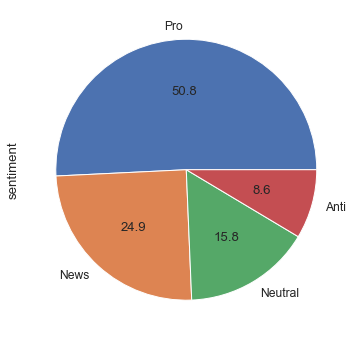

In [63]:
# Percentage split of the data
plt.figure(figsize=(6,6))
sns.set(font_scale=1.1)
df['sentiment'].value_counts().plot(kind='pie', autopct='%.1f', labels=['Pro','News','Neutral','Anti']);

Based on the pie chart, 50.8% of the tweets supports the belief of man-made climate change **(Pro)**, 24.9% are based on factual news about climate change **(News)**, 15.8% of the tweets are rather neutral on the subject **(Neutral)**, and 8.6% do not believe in man-made climate change **(Anti)**. 

## Feature Engineering

In [64]:
# Loading a spacy English dictionary for NLP
nlp = spacy.load('en_core_web_md')

In [65]:
# Apply train_test_split to prevent any data leakage when constructing the ML model
X = df[['message']]
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [66]:
def remove_characters(text):
    """
    Returns a message without any foreign characters, that is those
    that are not in our alphabets, numbering system, and not part of 
    punctuation marks
    
    Parameters
    -----------
    text: str
        A text message
    
    Returns
    --------
    str
        A text message without foreign characters
    """
    
    # Remove unidentifieable letters (i.e. foreign characters)
    local_characters = string.ascii_letters + string.digits + string.punctuation + ' ' 
    # Included spacing at the end so that it can be recorgnized in a string
    
    for char in text:
        if char not in local_characters:
            text = text.replace(char, '')
    
    return text.strip()

In [67]:
X_train.head()

,message
3266,@realDonaldTrump listen to only about 100 scie...
13458,RT @ClimateCentral: Scientists want to give th...
9464,...and then back to nah those folks that don't...
14752,Coral reefs’ only hope is halting global warmi...
1819,RT @foe_us: Through both GOP &amp; Dem adminis...


In [82]:
# Example message with foreign characters
X_train.iloc[7, 0]

'Has Pakistan really Ã¢â‚¬ËœimprovedÃ¢â‚¬â„¢ when it comes to tackling climate change? https://t.co/MYuR8WEMVu'

The message has unidentifiable letters which are not part of the English language. This might affect the size of 
the sparse matrix and also affect how the spaCy library reads the message.

In [84]:
# After applying the function
remove_characters(X_train.iloc[7, 0])

'Has Pakistan really improved when it comes to tackling climate change? https://t.co/MYuR8WEMVu'

The foreign characters are now removed from the message making the message more readable.

# Modeling

## Data Prepocessing

## Machine Learning 

### Logistic Regression

### Support Vector Machines

### KNearest Neighbors

### Naive Bayes

### Decision Tree

### Neural Networks

## Ensemble models

### VotingClassifier

### BaggingClassifier

# Balancing the data

## Downsampling

## Upsampling

## SMOTE

# Results

# Conclusion

The causes and effects of climate change are very clear at this point but what can we do? Firstly, the government can help the communities and businesses to reduce deforestation, plant new trees in the forest and empty land, earn sustainable livelihoods and adapt to changing climatic conditions. Next, teachers in lecturers in schools and tertiaries must give the knowledge of how to protect our earth from the very young age of the children and students. One of the reasons that caused the climate changes is the emission of carbon dioxide from the vehicles. Also, our famous political leaders and news channels also have to remove themselves from the anti class and lead by example. We ourselves can reduce the uses of vehicles and car-pooling in our daily lives.You can start practicing at home by switching off any electrical appliances when not in use this will help conserve energy

Conclusion there are many effects of climate changes that seriously affecting our environment, health and biodiversities. If we still have not take any actions to prevent the climate changes, our mother earth will be become sick more seriously.If not there will be serious environmental concerns . We need to protect our environment and give our next generation to have a better place to stay, we must always know how to prevent the climate changes such as stop cutting off the trees, save energy, car-pooling, etc. Therefore, let us keep our Mother Earth healthy